## Testing on actual inputs

unable to simulate it directly, this is the best way to test my method. simulating requires additional effort in just fully simulating it.

41150/41259 [============================>.] - ETA: 0s[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 ..., 
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]


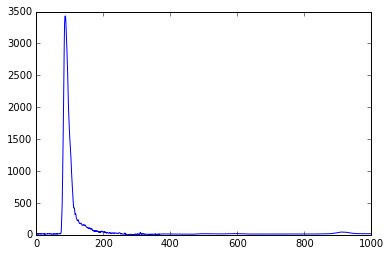

[ 0.  1.  0.]


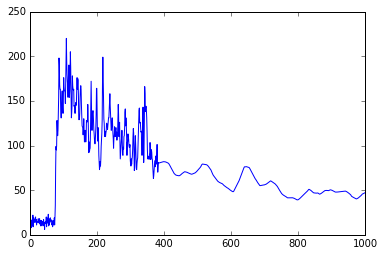

[ 1.  0.  0.]


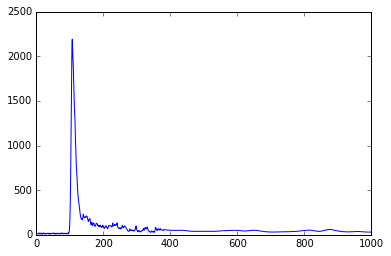

[ 0.  1.  0.]


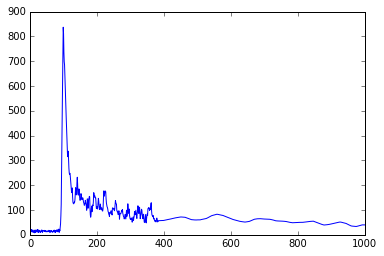

[ 1.  0.  0.]


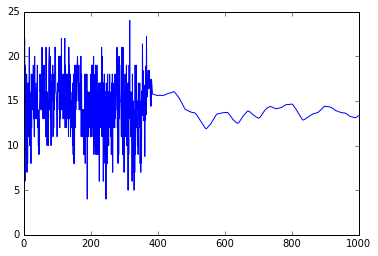

[ 1.  0.  0.]


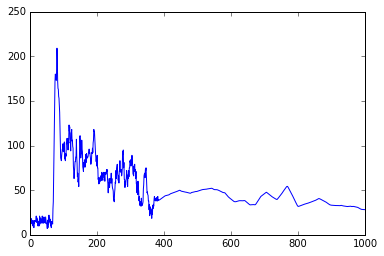

[ 1.  0.  0.]


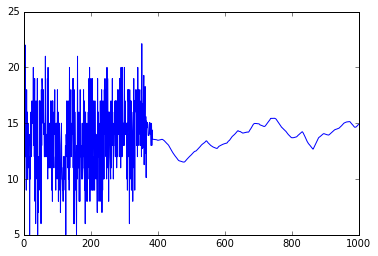

[ 1.  0.  0.]


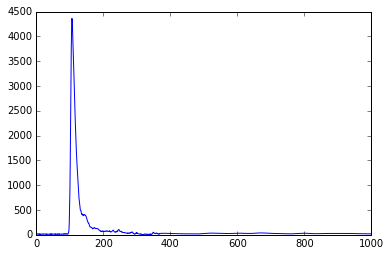

[ 0.  1.  0.]


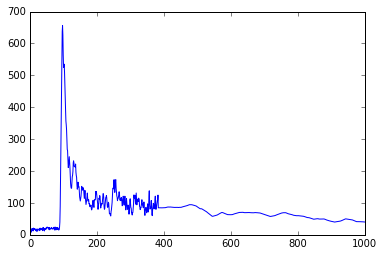

[ 1.  0.  0.]


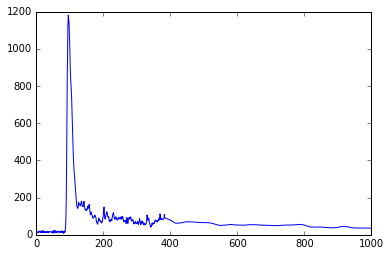

[ 0.  1.  0.]


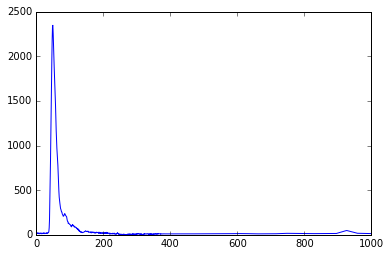

[ 0.  0.  1.]


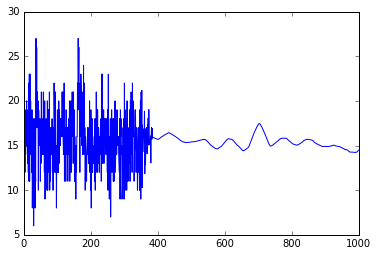

[ 1.  0.  0.]


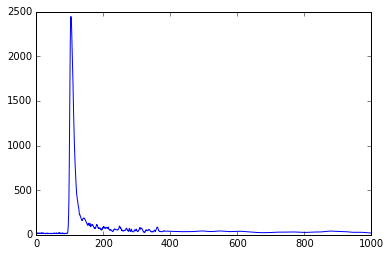

[ 0.  1.  0.]


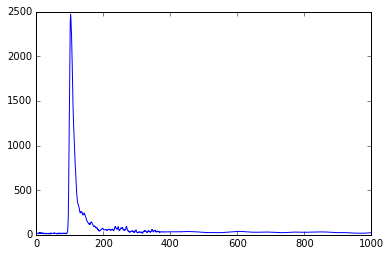

[ 0.  1.  0.]


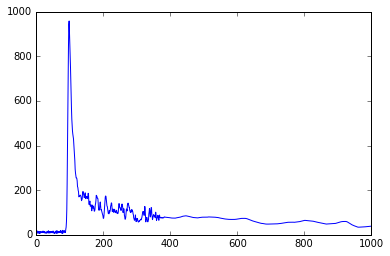

[ 1.  0.  0.]


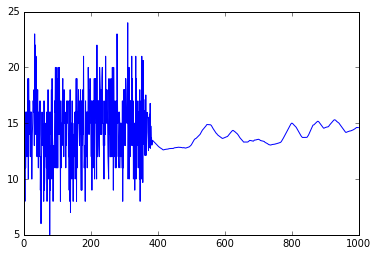

[ 1.  0.  0.]


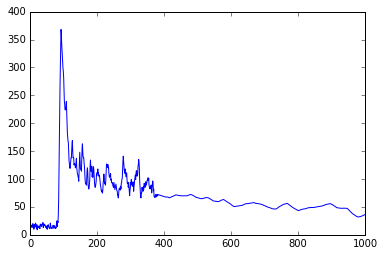

[ 1.  0.  0.]


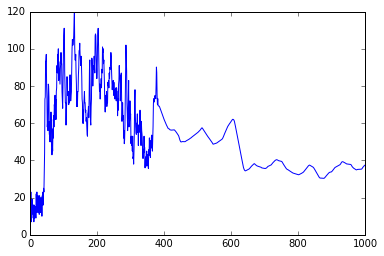

[ 1.  0.  0.]


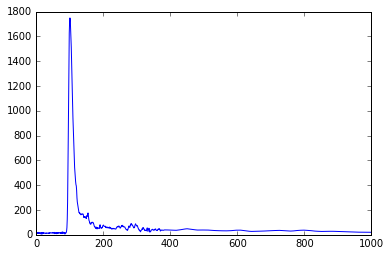

[ 0.  1.  0.]


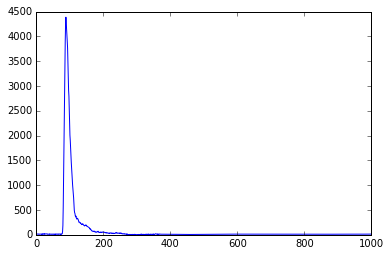

[ 0.  1.  0.]


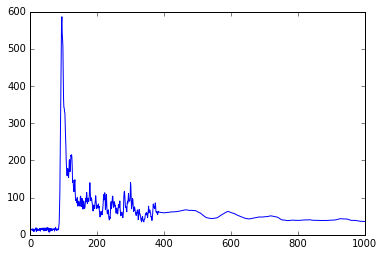

[ 1.  0.  0.]


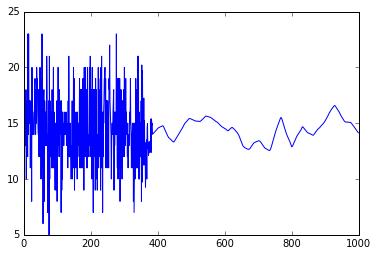

[ 1.  0.  0.]


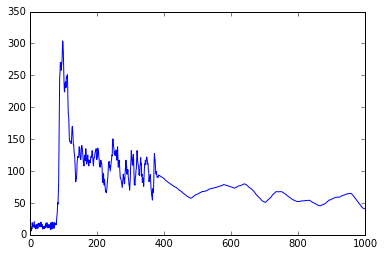

[ 1.  0.  0.]


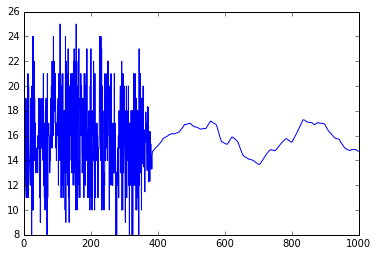

[ 1.  0.  0.]


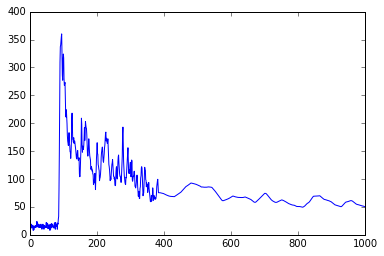

[ 1.  0.  0.]


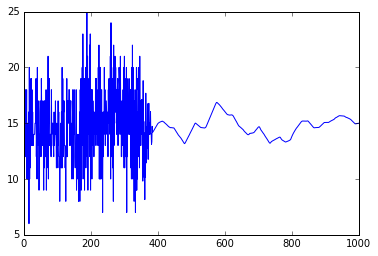

[ 1.  0.  0.]


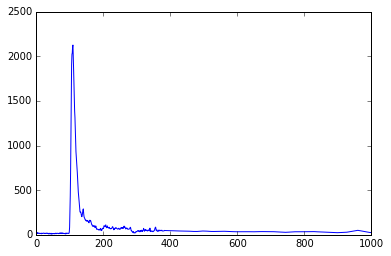

[ 0.  1.  0.]


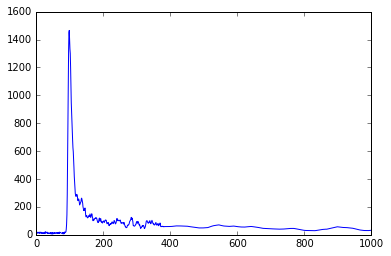

[ 0.  1.  0.]


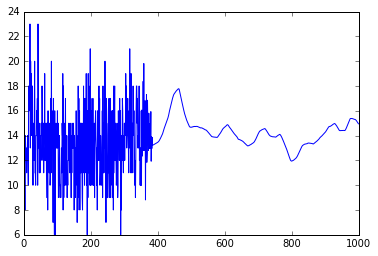

[ 1.  0.  0.]


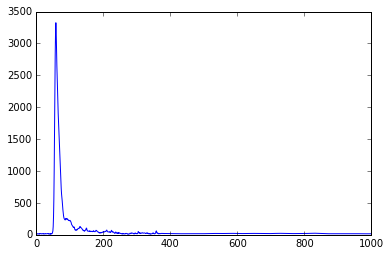

[ 0.  0.  1.]


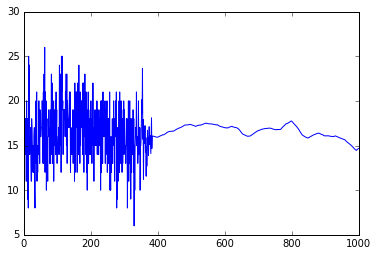

[ 1.  0.  0.]


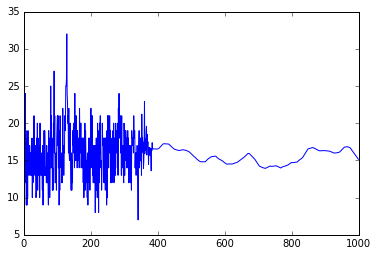

[ 1.  0.  0.]


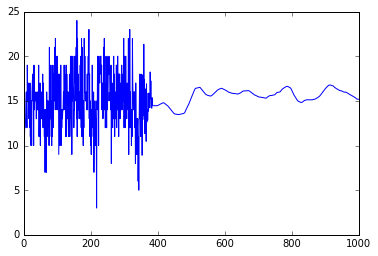

[ 1.  0.  0.]


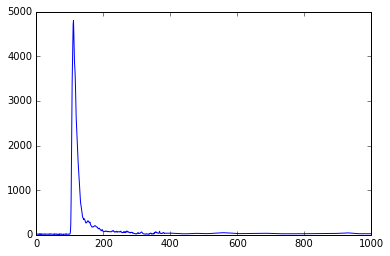

[ 0.  1.  0.]


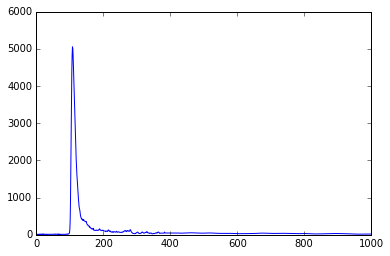

[ 0.  1.  0.]


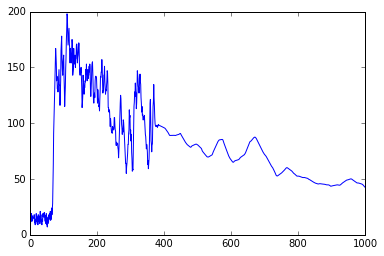

[ 1.  0.  0.]


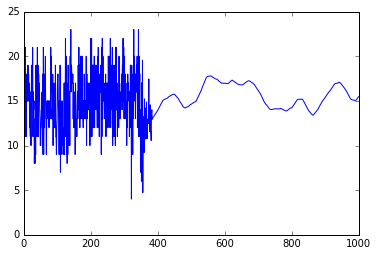

[ 1.  0.  0.]


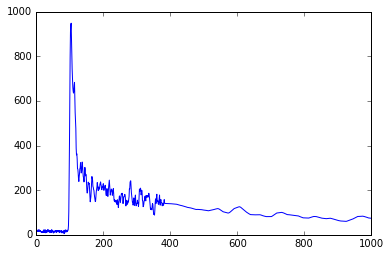

[ 1.  0.  0.]


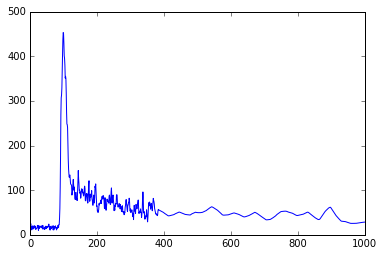

[ 1.  0.  0.]


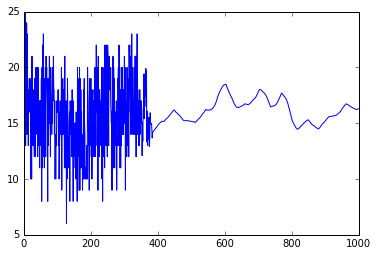

[ 1.  0.  0.]


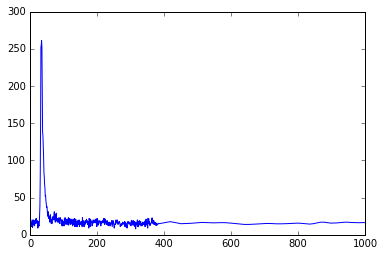

[ 1.  0.  0.]


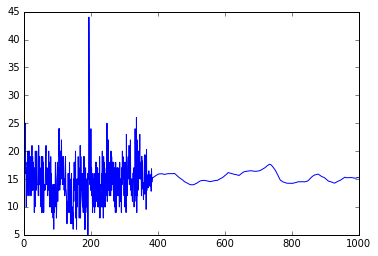

[ 1.  0.  0.]


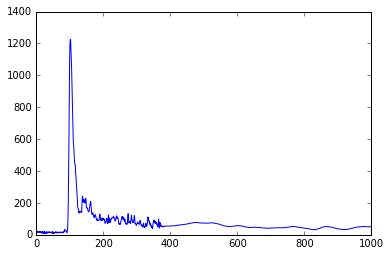

[ 0.  1.  0.]


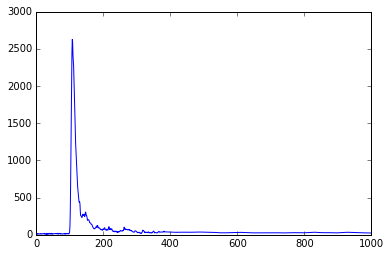

[ 0.  1.  0.]


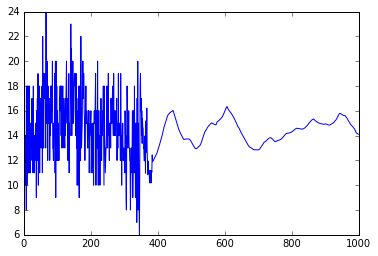

[ 1.  0.  0.]


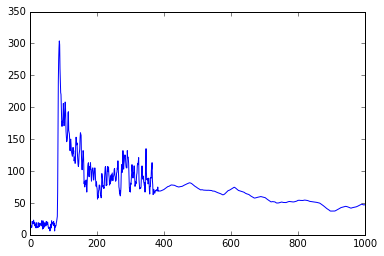

[ 1.  0.  0.]


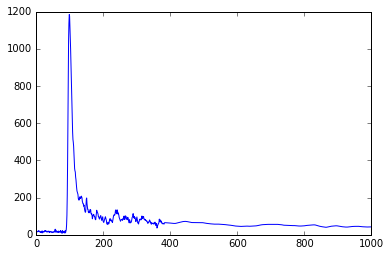

[ 0.  1.  0.]


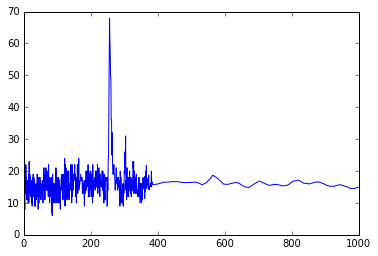

[ 1.  0.  0.]


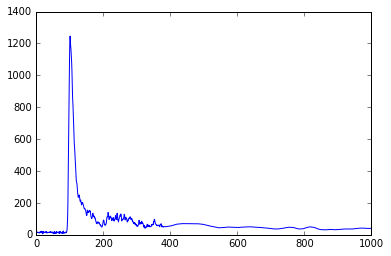

[ 0.  1.  0.]


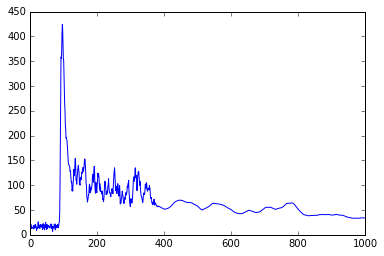

[ 1.  0.  0.]


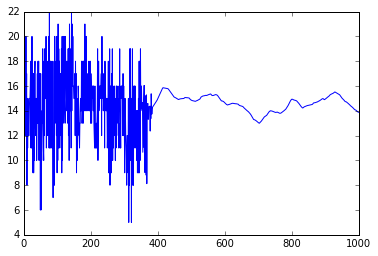

[ 1.  0.  0.]


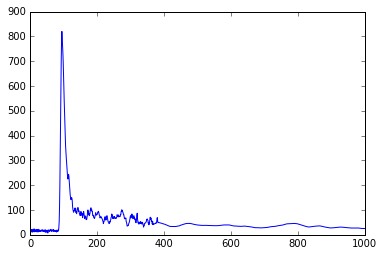

[ 1.  0.  0.]


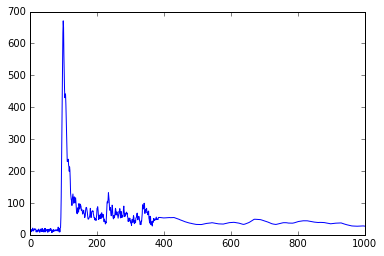

[ 1.  0.  0.]


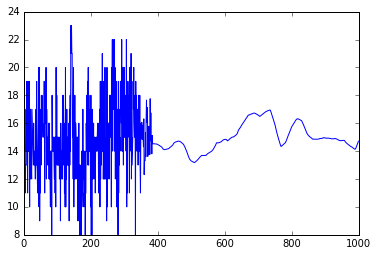

[ 1.  0.  0.]


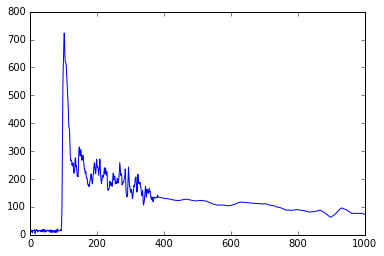

[ 1.  0.  0.]


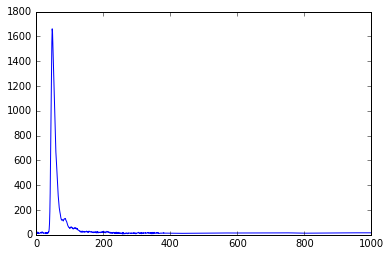

[ 0.  0.  1.]


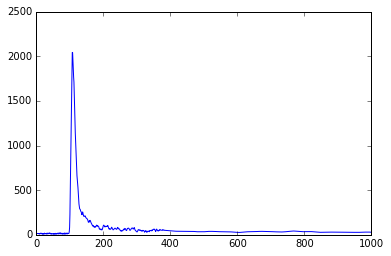

[ 0.  1.  0.]


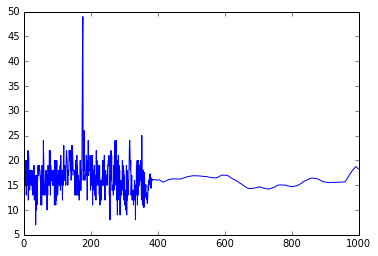

[ 1.  0.  0.]


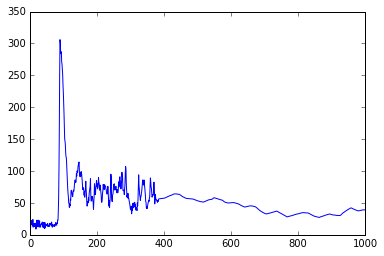

[ 1.  0.  0.]


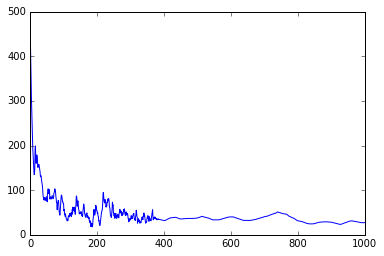

[ 1.  0.  0.]


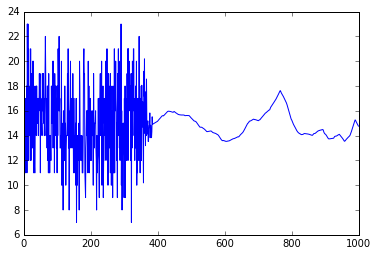

[ 1.  0.  0.]


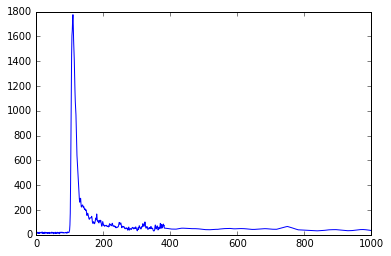

[ 0.  1.  0.]


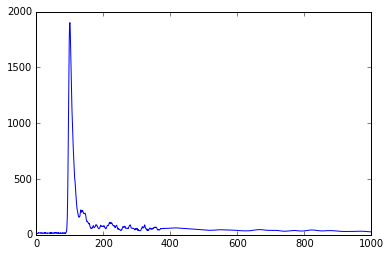

[ 0.  1.  0.]


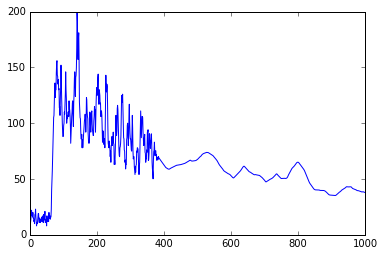

[ 1.  0.  0.]


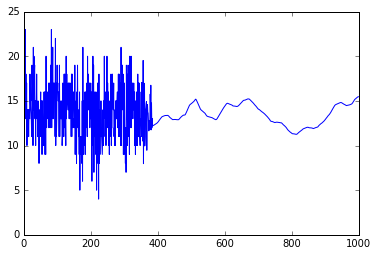

[ 1.  0.  0.]


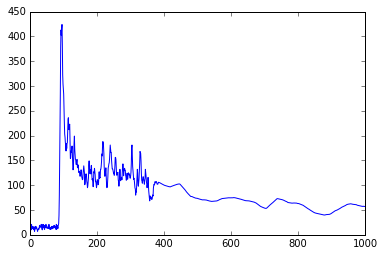

[ 1.  0.  0.]


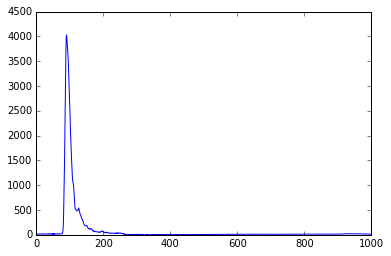

[ 0.  1.  0.]


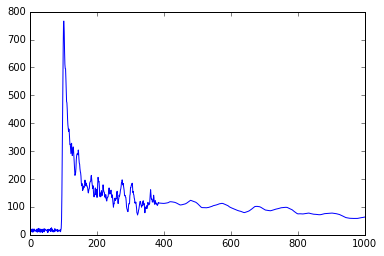

[ 1.  0.  0.]


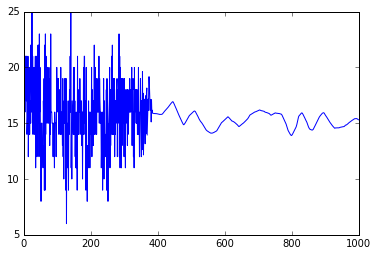

[ 1.  0.  0.]


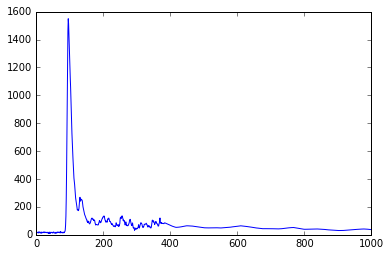

[ 0.  1.  0.]


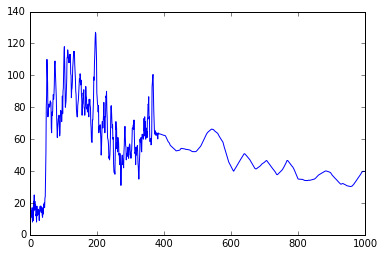

[ 1.  0.  0.]


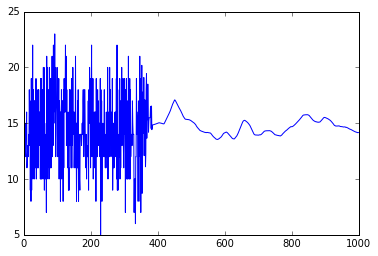

[ 1.  0.  0.]


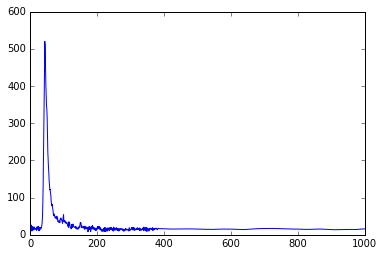

[ 1.  0.  0.]


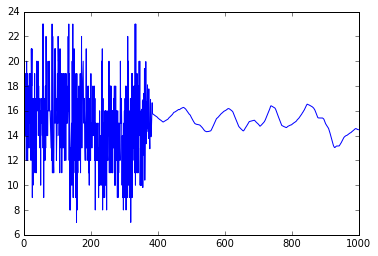

[ 1.  0.  0.]


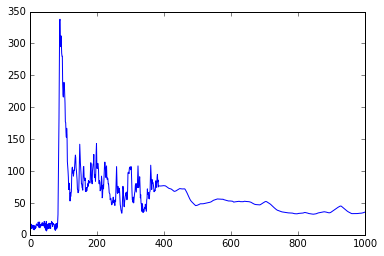

[ 1.  0.  0.]


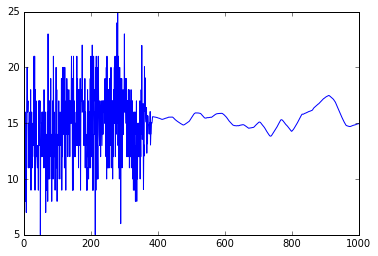

[ 1.  0.  0.]


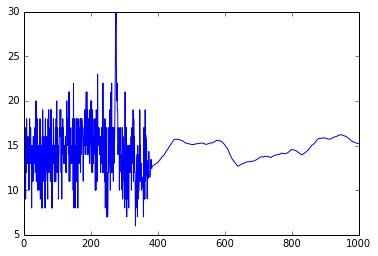

[ 1.  0.  0.]


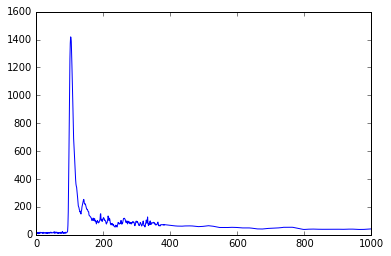

[ 0.  1.  0.]


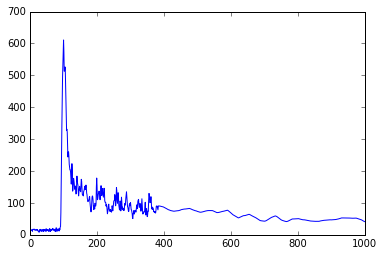

[ 1.  0.  0.]


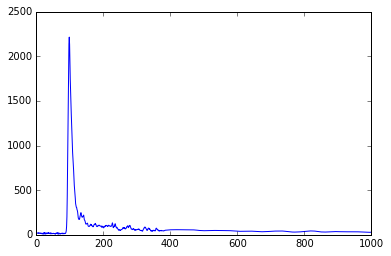

[ 0.  1.  0.]


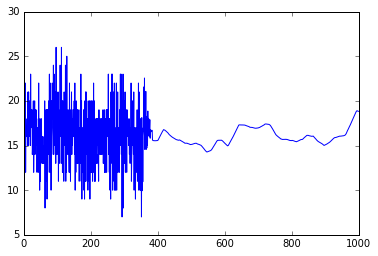

[ 1.  0.  0.]


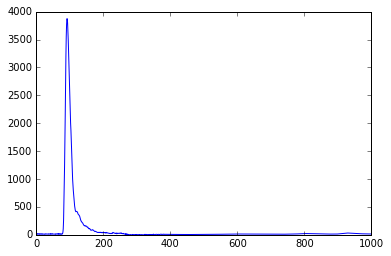

[ 0.  1.  0.]


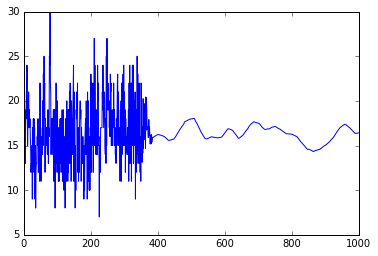

[ 1.  0.  0.]


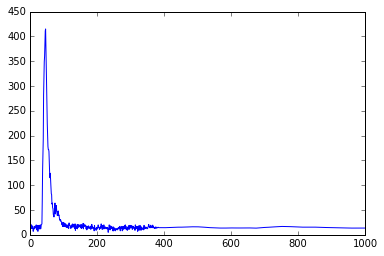

[ 1.  0.  0.]


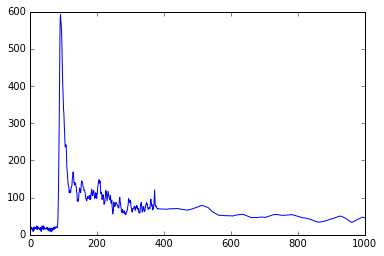

[ 1.  0.  0.]


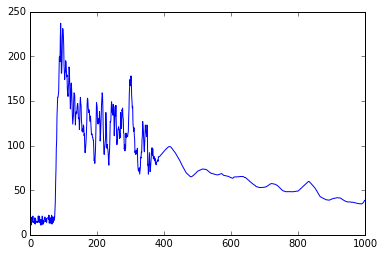

[ 1.  0.  0.]


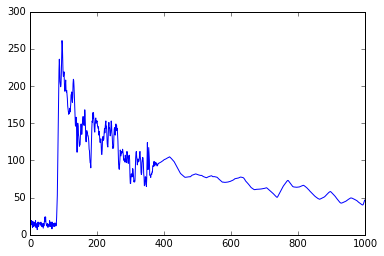

[ 1.  0.  0.]


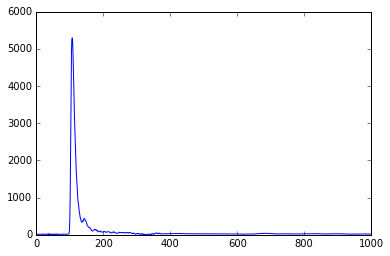

[ 0.  1.  0.]


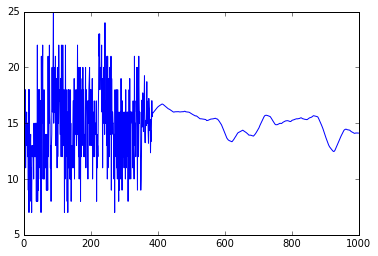

[ 1.  0.  0.]


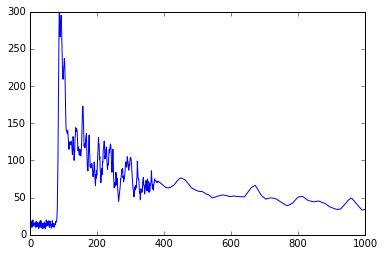

[ 1.  0.  0.]


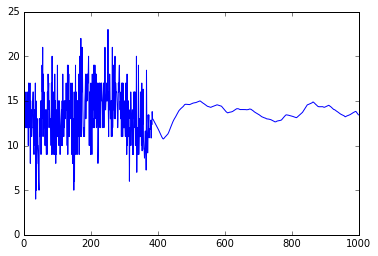

[ 1.  0.  0.]


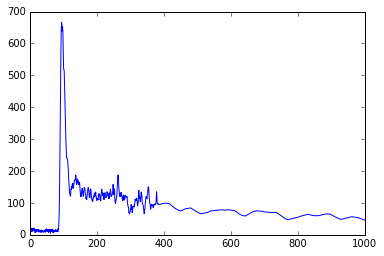

[ 1.  0.  0.]


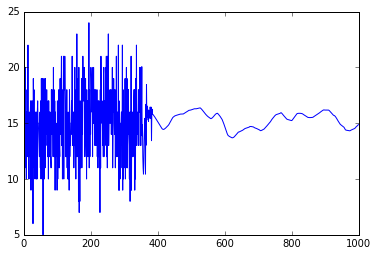

[ 1.  0.  0.]


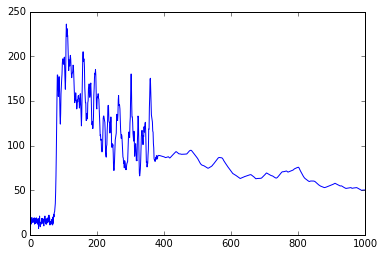

[ 1.  0.  0.]


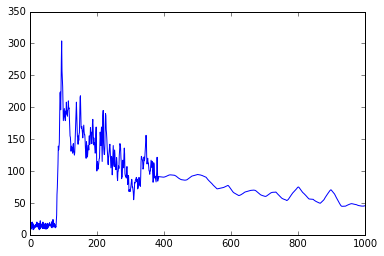

[ 1.  0.  0.]


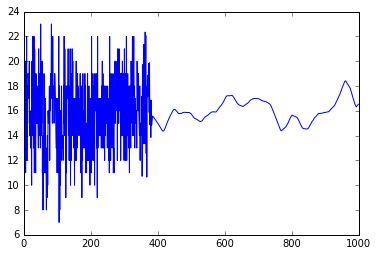

[ 1.  0.  0.]


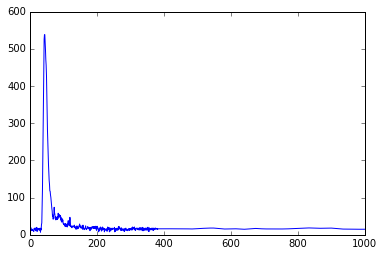

[ 1.  0.  0.]


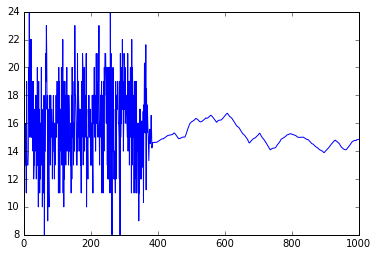

[ 1.  0.  0.]


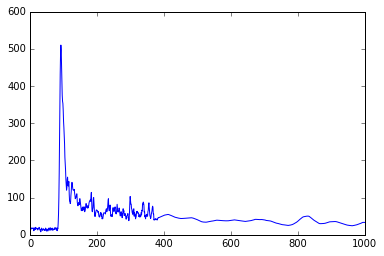

[ 1.  0.  0.]


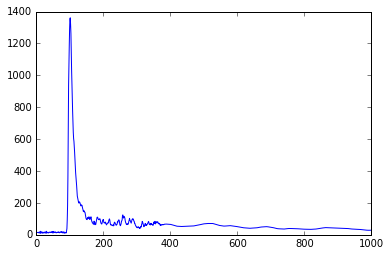

[ 0.  1.  0.]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from root_pandas import read_root

pmtall = read_root("Run009-230-002.root","tree",columns=["PMTALL"],flatten=["PMTALL"])
l,h = pmtall.shape
l=int(l/4480)
EventID = read_root("Run009-230-002.root","tree",columns=["EventID"])
# print(EventID)
# print(pmtall[1])
# print(EventID[1])

# label1 = np.array([0,6,14,19,26,41,44,47,52,65,73,80,83])
# label2 = np.array([1,4,5,7,10,12,15,18,21,24,27,31,34,39,42,45,46,51,53,56,58,61,63,67,70,76,79,84,85,88,91,94,96,97])
# label3 = np.array([2,3,8,9,11,13,16,17,20,22,23,25,28,29,30,32,33,35,36,37,38,40,43,49,50,54,55,57,59,60,62,64,66,68,69,71,72,74,75,77,78,81,82,86,87,89,90,92,98])

def NORMPMTALL(pmtall,num_entries):
    """
    Convert read_root into numpy for speed
    invert the PMT pulse
    get rid of the last 80 bin as those bins of the pulse do not matter
    """
    x = pmtall.PMTALL.values.reshape(num_entries,4480)
    x_abs = abs(x-15200)
    extra = np.arange(1000,4480)
#     initial = np.arange(50)

    x_mod = np.delete(x_abs,extra,axis=1)
#     x_f = np.delete(x_mod,initial,axis=1)
    # x_nor = normalize(x_mod,norm="l2")
    # print(np.sum(x_nor,axis=1))
    return x_mod

PMTALL = NORMPMTALL(pmtall,l)
pmtall = np.expand_dims(PMTALL,axis=2)

# class1 = []
# class2 = []
# class3 = []

# for i in label1:
#     class1.appned(pmtall)
    
import keras
from keras.models import load_model

model = load_model('for_root_implementation.h5')
preds = model.predict(pmtall,batch_size=50,verbose=1)

print(preds)
x = np.arange(len(pmtall[1]))

for i in range(100):
#     print(i,"\n")
    plt.figure()
    plt.plot(x,pmtall[i])
    plt.show()
    print(preds[i])